# Convolution operation

Explain convolution operation here.

In [1]:
# Numpy implementation
import numpy as np

X = np.random.randint(0,255,(6,6))
k = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

print("X shape {}".format(X.shape))
print("k shape {}".format(k.shape))

X shape (6, 6)
k shape (3, 3)


## Numpy 2D convolution

In [2]:
def conv2d(x, k):
    
    (k_rows,k_cols) = k.shape
    (x_rows,x_cols) = x.shape
    
    res_rows = x_rows - k_rows + 1
    res_cols = x_cols - k_cols + 1
    results = np.zeros((res_rows, res_cols))
    for i in range(0, (x_rows - k_rows) + 1):
        for j in range(0, (x_cols - k_cols) + 1):
            a = np.sum(np.multiply(x[i:i+k_rows, j:j+k_cols], k))
            results[i,j] = a
    return results

            

results = conv2d(X, k)
print(results)

[[ 105.  360.  358. -309.]
 [ -41.  257.  242. -393.]
 [-103.  192.   66. -137.]
 [ -16.  199.  -95.  -60.]]


## Run the convolution on an image

https://pillow.readthedocs.io/en/3.1.x/reference/Image.html

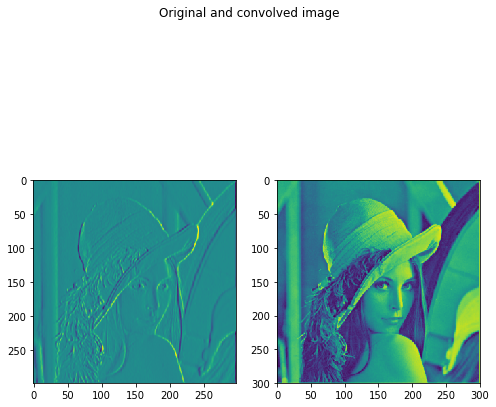

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

image_path = './data/images/edge_detection.png'
# Open and convert image to gray scale
im = Image.open(image_path).convert('L')
# Resize the image to (300,300)
resized = im.resize((300,300))
# convert to numpy array
img_array = np.array(resized)
# convolve the image
results = conv2d(img_array, k)

# Plot the image and convolved image
fig=plt.figure(figsize=(8, 8))
fig.suptitle('Original and convolved image')
fig.add_subplot(1,2,1)
plt.imshow(results)
fig.add_subplot(1,2,2)
plt.imshow(resized)

plt.show()

## Edge detection

Give details of edge detection here.

## Tensorflow Convolution

Data Format
NHWC (N, Height, width, channel) is the TensorFlow default and NCHW is the optimal format to use for NVIDIA cuDNN. If TensorFlow is compiled with the Intel MKL optimizations, many operations will be optimized and support NCHW. Otherwise, some operations are not supported on CPU when using NCHW

https://jhui.github.io/2017/03/07/TensorFlow-Perforamnce-and-advance-topics/



Image tensor shape (1, 300, 300, 1)
Kernal tensor shape (3, 3, 1, 1)


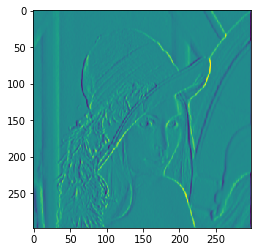

In [84]:
import tensorflow as tf

# img_tensor shape (N, H, W, C)
img_tensor = tf.constant(img_array, tf.float32)
img_tensor = tf.expand_dims(img_tensor, 0)
img_tensor = tf.expand_dims(img_tensor, -1)

# kernel tensor shape (H, W, input_depth, output_depth)
kernel_tensor = tf.constant(k, tf.float32)
kernel_tensor = tf.expand_dims(kernel_tensor, -1)
kernel_tensor = tf.expand_dims(kernel_tensor, -1)

print("Image tensor shape {}".format(img_tensor.shape))
print("Kernal tensor shape {}".format(kernel_tensor.shape))

results = tf.nn.convolution(img_tensor, kernel_tensor, strides =(1,1),data_format='NHWC').numpy()
# Alternatively
# tf.nn.conv2d(img_tensor, kernel_tensor, strides = (1,1), padding ='VALID')
results = np.squeeze(results)

plt.imshow(results)


## tf.keras.layers.Conv2D convolution

In [87]:
from tensorflow import keras
from tensorflow.keras import layers

tf.config.experimental_run_functions_eagerly(True)

#img_tensor = img_tensor / 255.
conv_ = layers.Conv2D(input_shape=(300,300,1),dtype=tf.float32, filters =1, kernel_size = (3,3), strides =1, \
                      padding = "valid", data_format = "channels_last",\
                      activation=None, use_bias=False, dilation_rate=1,\
                      name = "test_conv2d", trainable=False)
conv_(img_tensor)
conv_.set_weights([kernel_tensor])
conv_(img_tensor)




print(results)


[[ -1020.  -2040.   1020. ...   7140.  15045. -31620.]
 [   255.  -1275.   1020. ...  16830.  14280. -51000.]
 [  1275.    255.    255. ...  26520.   6885. -74205.]
 ...
 [ -1275.  -4335.    255. ...  -7905. -25755. -88485.]
 [  -255.  -5865.   2040. ...  -7650. -22440. -82365.]
 [     0.  -4845.   2805. ...  -5100. -17085. -67575.]]


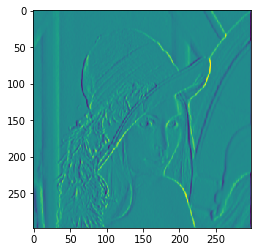

In [88]:
plt.imshow(results)

